# Popularity based recommendation Systems

### Importing Required Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv('data/movies.csv')

df.head(3)

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",5.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


In [4]:
df.shape

(28610, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28610 entries, 0 to 28609
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    28610 non-null  int64  
 1   title                 28610 non-null  object 
 2   genres                28562 non-null  object 
 3   overview              28610 non-null  object 
 4   rating                28610 non-null  float64
 5   spoken_languages      28408 non-null  object 
 6   cast                  28477 non-null  object 
 7   crew                  28584 non-null  object 
 8   vote_average          28610 non-null  float64
 9   vote_count            28610 non-null  float64
 10  popularity            28610 non-null  float64
 11  budget                28610 non-null  int64  
 12  keywords              27442 non-null  object 
 13  production_companies  27547 non-null  object 
 14  revenue               28610 non-null  float64
 15  runtime            

In [6]:
df.isnull().sum()

id                         0
title                      0
genres                    48
overview                   0
rating                     0
spoken_languages         202
cast                     133
crew                      26
vote_average               0
vote_count                 0
popularity                 0
budget                     0
keywords                1168
production_companies    1063
revenue                    0
runtime                    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26612 entries, 0 to 28609
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26612 non-null  int64  
 1   title                 26612 non-null  object 
 2   genres                26612 non-null  object 
 3   overview              26612 non-null  object 
 4   rating                26612 non-null  float64
 5   spoken_languages      26612 non-null  object 
 6   cast                  26612 non-null  object 
 7   crew                  26612 non-null  object 
 8   vote_average          26612 non-null  float64
 9   vote_count            26612 non-null  float64
 10  popularity            26612 non-null  float64
 11  budget                26612 non-null  int64  
 12  keywords              26612 non-null  object 
 13  production_companies  26612 non-null  object 
 14  revenue               26612 non-null  float64
 15  runtime            

# Building Popularity based Recommendation systems based on Weighted Rating (WR)

- We need a metric to score the movie.
- Calculate score of every movie.
- Sort the scores and recommend best rated movie to users
- We'll use IMDB weighted average score to score the movies

**Weighted Rating (WR)** =
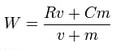

- v is the number of votes garnered by the movie
- m is the minimum number of votes required for the movie to be in the chart (the prerequisite)
- R is the mean rating of the movie from 0 to 10 (mean) = rating
- C is the mean of **vote_average**(rating) of all the movies in the dataset

source : http://trailerpark.weebly.com/imdb-rating.html?source=post_page

In [9]:
#Calculate the number of votes garnered by the 80th percentile movie
m = df['vote_count'].quantile(0.80)
m

1193.0

In [10]:
## Calculate C
C = df['vote_average'].mean()
C

6.56295280324665

In [11]:
df = df[df['vote_count'] >= m]

df.head(2)

,id,title,genres,overview,rating,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",3.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",4.0,English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0


In [12]:
def weighted_rating(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return ((v/v+m)*R) + ((m/v+m)*C)

In [13]:
df['score'] = df.apply(weighted_rating,axis=1)

In [14]:
df.drop(labels=['rating'],axis=1,inplace=True)

In [15]:
df.head(3)

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
0,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17024.848604
1,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17024.848604
2,862,Toy Story,Animation Comedy Family,"Led by Woody, Andy's toys live happily in his ...",English,TomHanks TimAllen DonRickles,JohnLasseter,7.7,5415.0,21.946943,30000000,jealousy toy boy friendship friends rivalry bo...,Pixar Animation Studios,373554033.0,81.0,17024.848604


In [16]:
df.duplicated().sum()

4465

In [17]:
new_df = df.drop_duplicates()

In [18]:
new_df = new_df.sort_values('score', ascending=False)

new_df[["title", "vote_count", "vote_average", "score",'popularity']].head(10)

,title,vote_count,vote_average,score,popularity
3323,The Godfather,6024.0,8.5,17979.902429,41.109264
1439,The Shawshank Redemption,8358.0,8.5,17979.539474,51.645403
4700,Psycho,2405.0,8.3,17743.058246,36.826309
4523,One Flew Over the Cuckoo's Nest,3001.0,8.3,17742.411692,35.529554
4718,The Godfather: Part II,3418.0,8.3,17742.093391,36.629307
8655,Life Is Beautiful,3643.0,8.3,17741.951913,39.394970
17139,Spirited Away,3968.0,8.3,17741.775880,41.048867
27805,Whiplash,4376.0,8.3,17741.591909,64.299990
2352,Schindler's List,4436.0,8.3,17741.567708,41.725123
1350,Pulp Fiction,8670.0,8.3,17740.705763,140.950236


Text(0, 0.5, 'Movie Title')

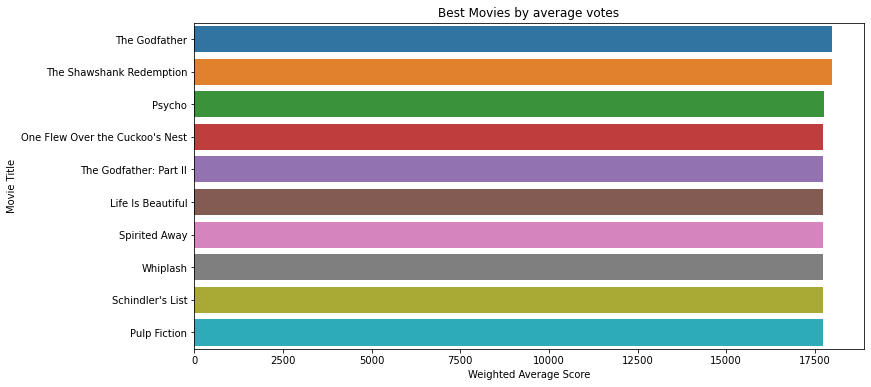

In [19]:
weight_average = new_df.sort_values('score',ascending=False)

plt.figure(figsize=(12,6))

axis1=sns.barplot(x=weight_average['score'].head(10), y=weight_average['title'].head(10), data=weight_average)

plt.title('Best Movies by average votes')
plt.xlabel('Weighted Average Score')
plt.ylabel('Movie Title')

# Building Popularity based recommendation systems based on popularity score

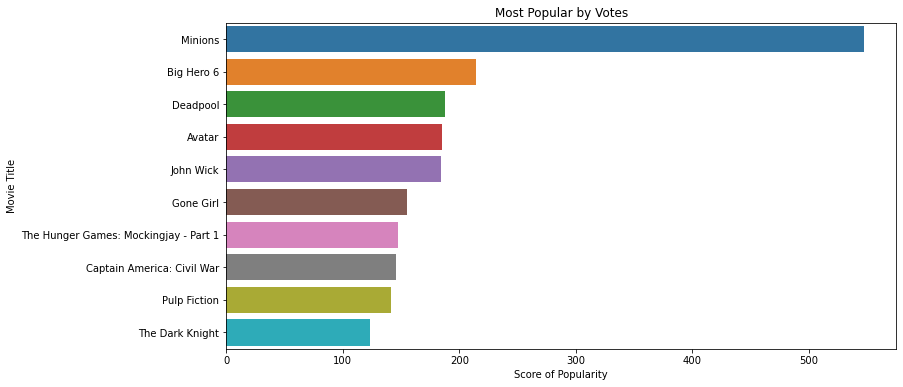

In [20]:
popularity = new_df.sort_values('popularity',ascending=False)

plt.figure(figsize=(12,6))

ax = sns.barplot(x=popularity['popularity'].head(10), y=popularity['title'].head(10), data=popularity)

plt.title('Most Popular by Votes')
plt.xlabel('Score of Popularity')
plt.ylabel('Movie Title')

plt.show()

# Model serialization and deserialization

In [21]:
from pickle import dump
from pickle import load

In [22]:
dump(weight_average,open('movies_popularity.pkl','wb'))

dump(popularity,open('weight_average.pkl','wb'))

In [23]:
popularity = load(open('movies_popularity.pkl', 'rb'))
weighted_score = load(open('weight_average.pkl', 'rb'))

In [24]:
popularity.head(2)

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
3323,238,The Godfather,Drama Crime,"Spanning the years 1945 to 1955, a chronicle o...",English Italiano Latin,MarlonBrando AlPacino JamesCaan,FrancisFordCoppola,8.5,6024.0,41.109264,6000000,italy loveatfirstsight lossoffather patriarch ...,Paramount Pictures Alfran Productions,245066411.0,175.0,17979.902429
1439,278,The Shawshank Redemption,Drama Crime,Framed in the 1940s for the double murder of h...,English,TimRobbins MorganFreeman BobGunton,FrankDarabont,8.5,8358.0,51.645403,25000000,prison corruption policebrutality prisoncell d...,Castle Rock Entertainment Warner Bros.,28341469.0,142.0,17979.539474


In [25]:
weighted_score.head(2)

,id,title,genres,overview,spoken_languages,cast,crew,vote_average,vote_count,popularity,budget,keywords,production_companies,revenue,runtime,score
28352,211672,Minions,Family Animation Adventure Comedy,"Minions Stuart, Kevin and Bob are recruited by...",English,SandraBullock JonHamm MichaelKeaton,KyleBalda,6.4,4729.0,547.488298,74000000,assistant aftercreditsstinger duringcreditssti...,Universal Pictures Illumination Entertainment,1.156731e+09,91.0,15472.858351
27959,177572,Big Hero 6,Adventure Family Animation Action Comedy,The special bond that develops between plus-si...,English,ScottAdsit RyanPotter DanielHenney,ChrisWilliams,7.8,6289.0,213.849907,165000000,brotherbrotherrelationship hero talent revenge...,Walt Disney Pictures Walt Disney Animation Stu...,6.521054e+08,102.0,17144.047662
